In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
#!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
fuel_consumption="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df=pd.read_csv(fuel_consumption)

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


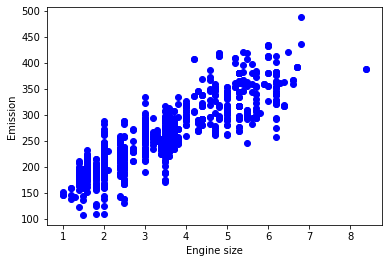

In [5]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

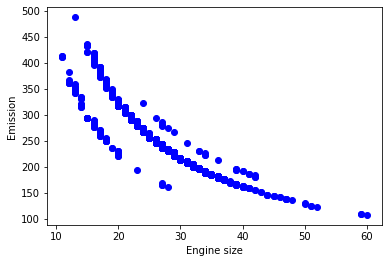

In [6]:
plt.scatter(df.FUELCONSUMPTION_COMB_MPG, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [7]:
from sklearn import linear_model
from sklearn.metrics import r2_score
regr=linear_model.LinearRegression()
regr.fit(df[["ENGINESIZE","FUELCONSUMPTION_COMB_MPG"]],df["CO2EMISSIONS"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(regr.coef_)

[18.26368777 -4.89127896]


In [10]:
print(regr.intercept_)

324.4453196719211


In [11]:
yhat=regr.predict(df[["ENGINESIZE","FUELCONSUMPTION_COMB_MPG"]])

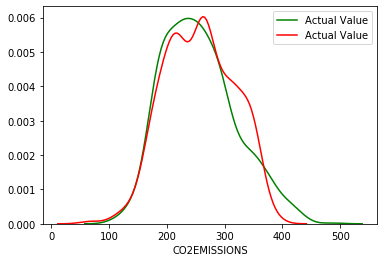

In [13]:
import seaborn as sns
ax1=sns.distplot(df["CO2EMISSIONS"],hist=False,color="green",label="Actual Value")
sns.distplot(yhat,hist=False,color="red",label="Actual Value",ax=ax1)

In [14]:
regr.score(df[["ENGINESIZE","FUELCONSUMPTION_COMB_MPG"]],df["CO2EMISSIONS"])

0.8792028337778282

In [15]:
r2_score(df["CO2EMISSIONS"],yhat)

0.8792028337778282

In [17]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(df["CO2EMISSIONS"],yhat))

484.672670238851
